# Gradient Boosting

In [22]:
import pandas as pd
import numpy as np
np.random.seed(2019)

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import r2_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve


import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
    
import matplotlib.pyplot as plt
%matplotlib inline

# Data regression

In [11]:
X, y = make_regression(n_samples=10000, n_features=100, noise=15, random_state=2019)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree Regressor

0.4355946601836794

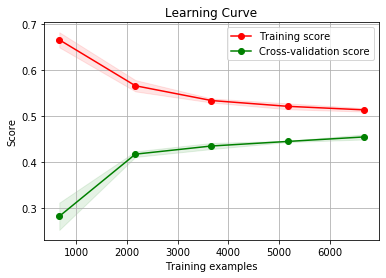

In [12]:
model = DecisionTreeRegressor(random_state=2019, max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=2019, shuffle=True)

r2_score(y_test, y_pred)

# Random Forest Regressor

0.5728496824167465

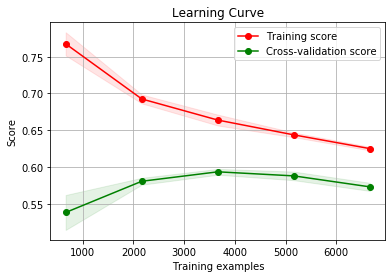

In [16]:
model = RandomForestRegressor(random_state=2019, n_estimators=10, max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=2019, shuffle=True)

r2_score(y_test, y_pred)

# XGBRegressor

0.9177307504564801

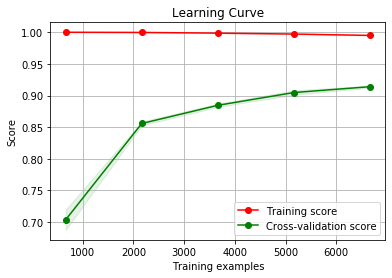

In [17]:
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=2019)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=2019, shuffle=True)

r2_score(y_test, y_pred)

# LGBMRegressor

0.929053096400787

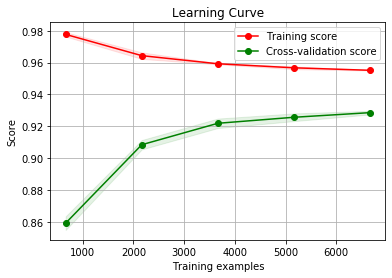

In [18]:
model = lgb.LGBMRegressor(n_estimators=100, random_state=2019, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=2019, shuffle=True)

r2_score(y_test, y_pred)

# Cat Boost Regressor

In [20]:
model = ctb.CatBoostRegressor(n_estimators=100, depth=5, random_state=2019, verbose=False)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

AttributeError: module 'pandas' has no attribute 'DataFrame'